In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.svm import SVC

# Additional imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score , confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV, cross_validate

import warnings
warnings.simplefilter(action='ignore')

In [2]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
df.shape
df.drop('CustomerID',axis=1,inplace=True)

In [4]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [6]:
df.nunique()

Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [7]:
# colums to list
columns = df.columns.to_list()
columns

['Churn',
 'Tenure',
 'PreferredLoginDevice',
 'CityTier',
 'WarehouseToHome',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [8]:
df.select_dtypes(exclude=np.number).columns

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [9]:
df.select_dtypes(include=np.number).columns

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [10]:
df.describe().T.style.bar(subset=['mean']).background_gradient(subset=['std','50%','max'])

,count,mean,std,min,25%,50%,75%,max
Churn,5630.000000,0.168384,0.374240,0.000000,0.000000,0.000000,0.000000,1.000000
Tenure,5366.000000,10.189899,8.557241,0.000000,2.000000,9.000000,16.000000,61.000000
CityTier,5630.000000,1.654707,0.915389,1.000000,1.000000,1.000000,3.000000,3.000000
WarehouseToHome,5379.000000,15.639896,8.531475,5.000000,9.000000,14.000000,20.000000,127.000000
HourSpendOnApp,5375.000000,2.931535,0.721926,0.000000,2.000000,3.000000,3.000000,5.000000
NumberOfDeviceRegistered,5630.000000,3.688988,1.023999,1.000000,3.000000,4.000000,4.000000,6.000000
SatisfactionScore,5630.000000,3.066785,1.380194,1.000000,2.000000,3.000000,4.000000,5.000000
NumberOfAddress,5630.000000,4.214032,2.583586,1.000000,2.000000,3.000000,6.000000,22.000000
Complain,5630.000000,0.284902,0.451408,0.000000,0.000000,0.000000,1.000000,1.000000
OrderAmountHikeFromlastYear,5365.000000,15.707922,3.675485,11.000000,13.000000,15.000000,18.000000,26.000000


In [11]:
#As mobile phone and phone are both same so we have merged them
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

In [12]:
df['PreferredLoginDevice'].value_counts()

PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64

In [13]:
#as cod is also cash on delievery
#as cc is also credit card so i merged them
df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'   # uses loc function
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

In [14]:
df['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64

In [15]:
# convert num_cols to categories
df2 = df.copy()
for col in df2.columns:
  if col == 'CustomerID':
    continue

  else:
    if df2[col].dtype == 'int':
      df2[col] = df[col].astype(str)

df2.dtypes

Churn                           object
Tenure                         float64
PreferredLoginDevice            object
CityTier                        object
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered        object
PreferedOrderCat                object
SatisfactionScore               object
MaritalStatus                   object
NumberOfAddress                 object
Complain                        object
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [16]:
# Numerical cols after Converting
df2.describe().T.style.bar(subset=['mean']).background_gradient(subset=['std','50%','max'])

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.000000,10.189899,8.557241,0.000000,2.000000,9.000000,16.000000,61.000000
WarehouseToHome,5379.000000,15.639896,8.531475,5.000000,9.000000,14.000000,20.000000,127.000000
HourSpendOnApp,5375.000000,2.931535,0.721926,0.000000,2.000000,3.000000,3.000000,5.000000
OrderAmountHikeFromlastYear,5365.000000,15.707922,3.675485,11.000000,13.000000,15.000000,18.000000,26.000000
CouponUsed,5374.000000,1.751023,1.894621,0.000000,1.000000,1.000000,2.000000,16.000000
OrderCount,5372.000000,3.008004,2.939680,1.000000,1.000000,2.000000,3.000000,16.000000
DaySinceLastOrder,5323.000000,4.543491,3.654433,0.000000,2.000000,3.000000,7.000000,46.000000
CashbackAmount,5630.000000,177.223030,49.207036,0.000000,145.770000,163.280000,196.392500,324.990000


In [17]:
# the sum of null values
grouped_data = []
for col in columns:
    n_missing = df[col].isnull().sum()
    percentage = n_missing / df.shape[0] * 100
    grouped_data.append([col, n_missing, percentage])

# Create a new DataFrame from the grouped data
grouped_df = pd.DataFrame(grouped_data, columns=['column', 'n_missing', 'percentage'])

# Group by 'col', 'n_missing', and 'percentage'
result = grouped_df.groupby(['column', 'n_missing', 'percentage']).size()
result

column                       n_missing  percentage
CashbackAmount               0          0.000000      1
Churn                        0          0.000000      1
CityTier                     0          0.000000      1
Complain                     0          0.000000      1
CouponUsed                   256        4.547069      1
DaySinceLastOrder            307        5.452931      1
Gender                       0          0.000000      1
HourSpendOnApp               255        4.529307      1
MaritalStatus                0          0.000000      1
NumberOfAddress              0          0.000000      1
NumberOfDeviceRegistered     0          0.000000      1
OrderAmountHikeFromlastYear  265        4.706927      1
OrderCount                   258        4.582593      1
PreferedOrderCat             0          0.000000      1
PreferredLoginDevice         0          0.000000      1
PreferredPaymentMode         0          0.000000      1
SatisfactionScore            0          0.000000     

In [18]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
binary_cat_cols = ['Complain']
outcome = ['Churn']
cat_cols = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
       'Gender', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain']
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


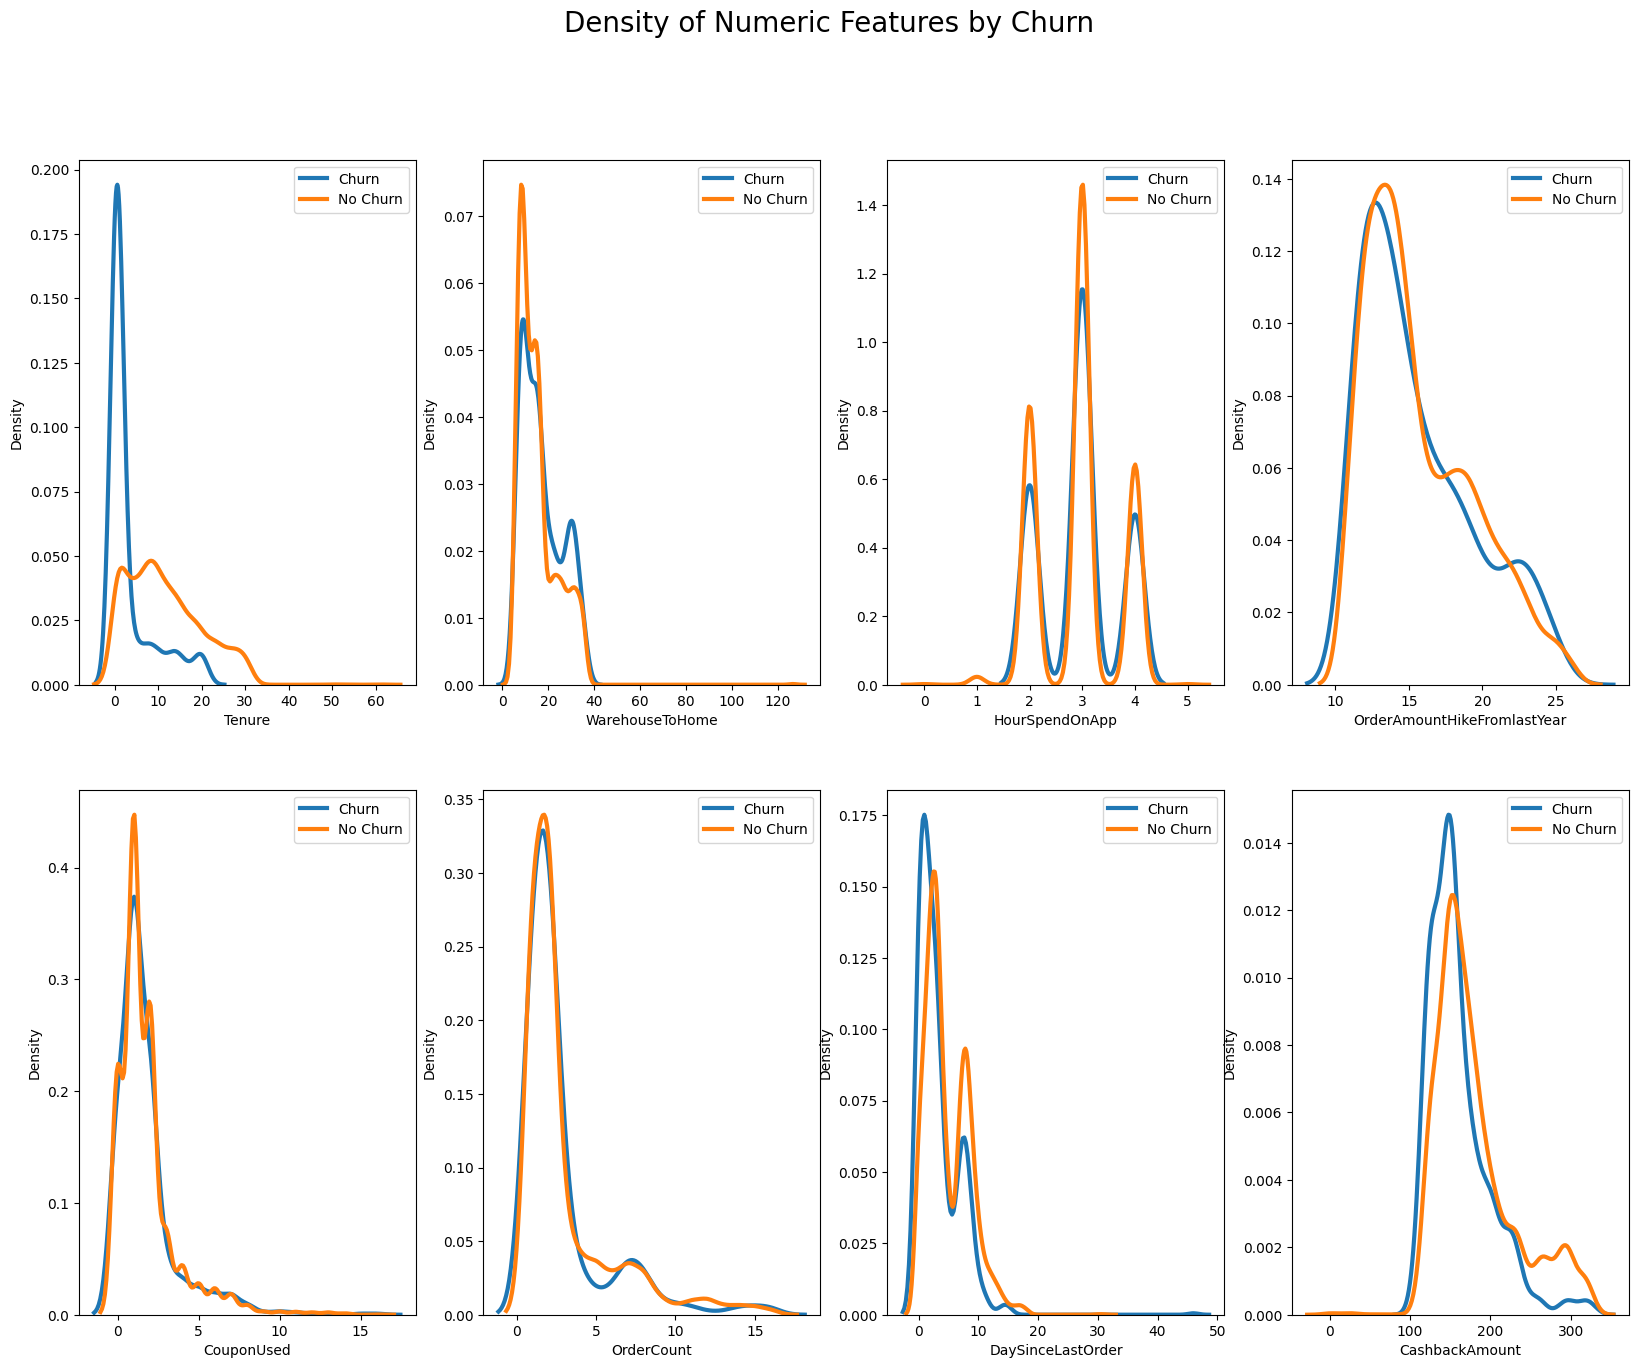

In [19]:
df_c = df[df['Churn']==1].copy()
df_nc = df[df['Churn']==0].copy()

fig, ax = plt.subplots(2,4,figsize=(20, 15))
fig.suptitle('Density of Numeric Features by Churn', fontsize=20)
ax = ax.flatten()

for idx,c in enumerate(num_cols):
    sns.kdeplot(df_c[c], linewidth= 3,
             label = 'Churn',ax=ax[idx])
    sns.kdeplot(df_nc[c], linewidth= 3,
             label = 'No Churn',ax=ax[idx])

    ax[idx].legend(loc='upper right')

plt.show()

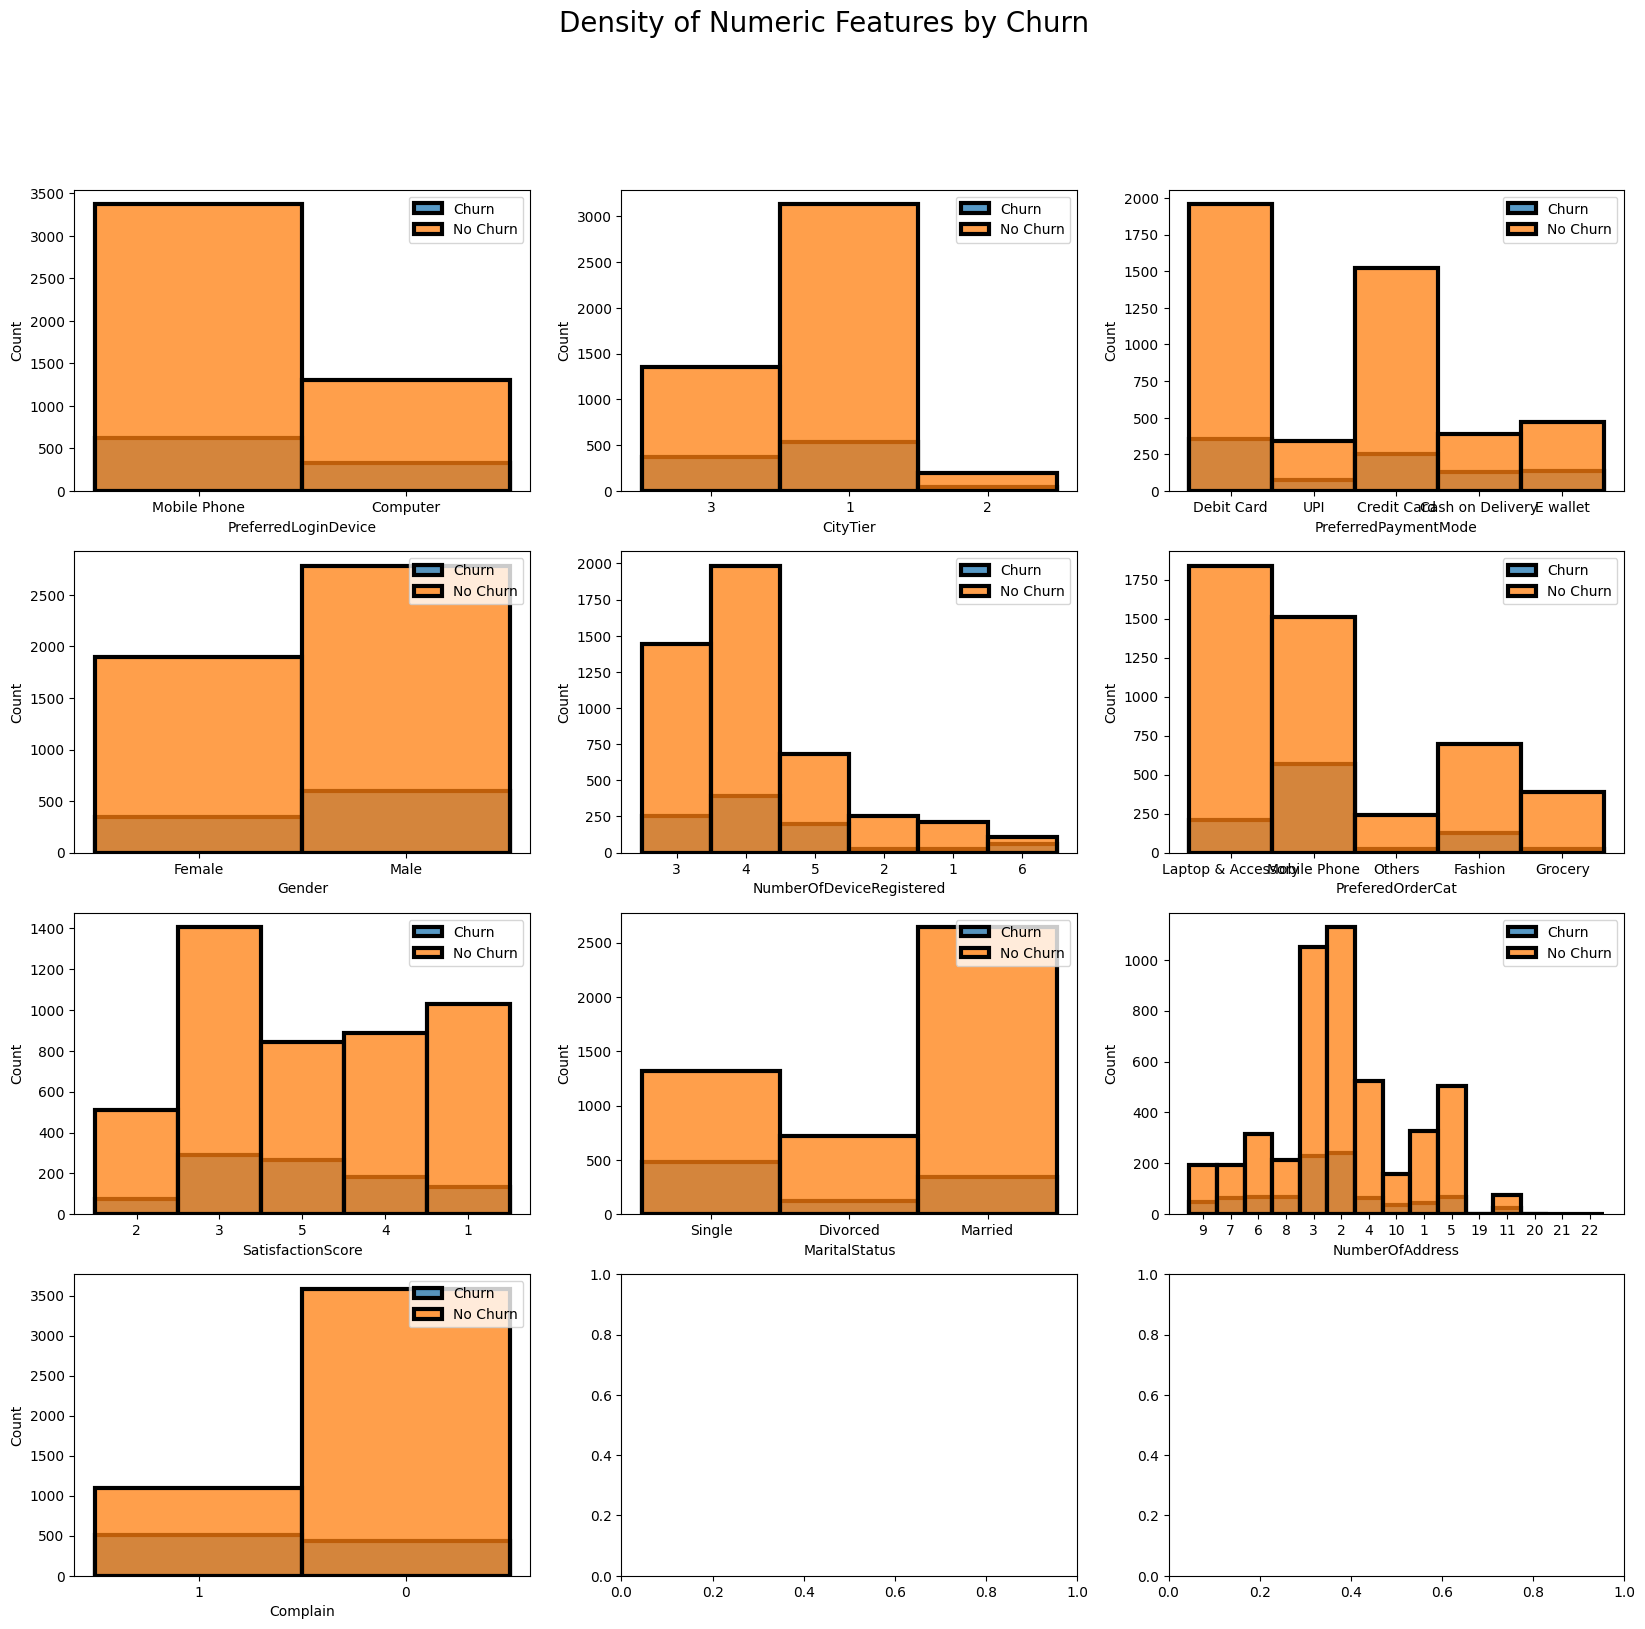

In [20]:
df_c = df2[df2['Churn']=='1'].copy()
df_nc = df2[df2['Churn']=='0'].copy()

fig, ax = plt.subplots(4,3,figsize=(20, 18))
fig.suptitle('Density of Numeric Features by Churn', fontsize=20)
ax = ax.flatten()

for idx,c in enumerate(cat_cols):
    sns.histplot(df_c[c], linewidth= 3,
             label = 'Churn',ax=ax[idx])
    sns.histplot(df_nc[c], linewidth= 3,
             label = 'No Churn',ax=ax[idx])

    ax[idx].legend(loc='upper right')

plt.show()

In [21]:
df['Gender'].value_counts()

Gender
Male      3384
Female    2246
Name: count, dtype: int64

In [22]:
df.groupby("Churn")["Gender"].value_counts() # the churned females ratio 348/2246 * 100
                                              # the churned males ratio 600/3384 * 100

Churn  Gender
0      Male      2784
       Female    1898
1      Male       600
       Female     348
Name: count, dtype: int64

In [23]:
df.groupby("PreferredLoginDevice")["OrderCount"].value_counts() # the churned females ratio 348/2246 * 100


PreferredLoginDevice  OrderCount
Computer              2.0            573
                      1.0            486
                      3.0            132
                      4.0             61
                      7.0             59
                      5.0             48
                      8.0             44
                      6.0             40
                      14.0            20
                      9.0             19
                      11.0            16
                      10.0            15
                      12.0            15
                      13.0             9
                      15.0             8
                      16.0             4
Mobile Phone          2.0           1452
                      1.0           1265
                      3.0            239
                      7.0            147
                      4.0            143
                      5.0            133
                      8.0            128
                      6.

<Axes: xlabel='Gender'>

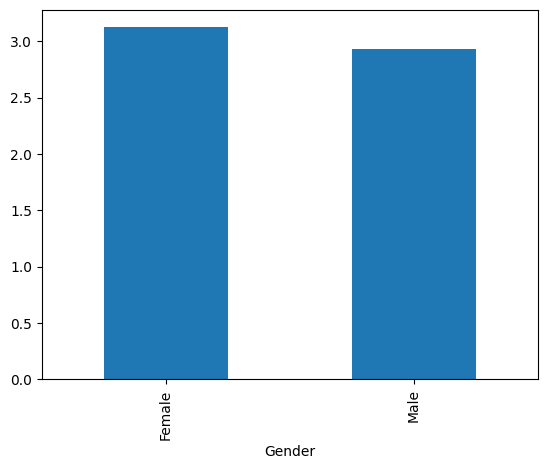

In [24]:
gender_orders = df.groupby('Gender')['OrderCount'].mean().plot(kind='bar')

gender_orders  # females have more order count avg

There is not a big difference between the males and the female average order count


In [25]:
percentageM =600/3384 * 100

percentageM   #the percentage of the leaving males out of the males

17.73049645390071

In [26]:
percentageF =348/2246 * 100

percentageF  #the percentage of the leaving females out of the females


15.49421193232413

In [27]:
import pandas as pd
import plotly.express as px

# Create figure
fig = px.pie(df, values='Churn', names='Gender')
fig.update_traces(marker=dict(colors=['pink ', 'baby blue']))

# Update layout
fig.update_layout(
  title='Churn Rate by Gender',
  legend_title='Gender'
)

# Show plot
fig.show()


Text(0, 0.5, 'Churn Rate')

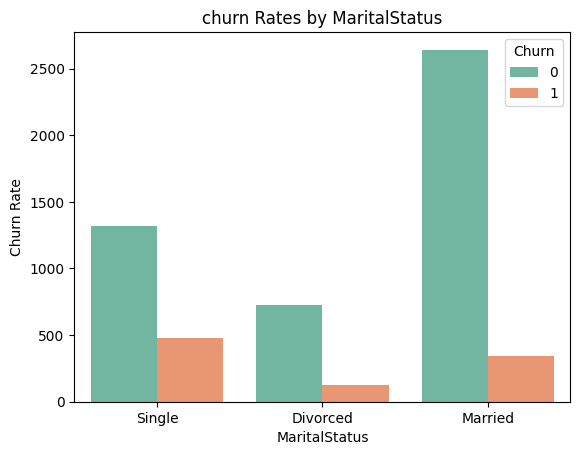

In [28]:
sns.countplot(x='MaritalStatus',hue='Churn',data=df,palette='Set2')
plt.title("churn Rates by MaritalStatus")
plt.ylabel("Churn Rate")

Singles are more likely to churn as compared to married people.


In [29]:
df_grouped_OrderCount = df.groupby('CityTier')['OrderCount'].agg(['mean', 'max'])
df_grouped_OrderCount

,mean,max
CityTier,,
1,2.953255,16.0
2,2.584034,13.0
3,3.185185,16.0


In [30]:
df.groupby("CityTier")["OrderCount"].mean()

CityTier
1    2.953255
2    2.584034
3    3.185185
Name: OrderCount, dtype: float64

City tier 3 has the highest order average but it is not a strong factor in the customer churning


In [31]:
import matplotlib.pyplot as plt

# plot
fig = px.histogram(df2, x="HourSpendOnApp", y="SatisfactionScore", orientation="h", color="Churn" ,text_auto= True , title="<b>"+'HourSpendOnApp Vs SatisfactionScore' , color_discrete_sequence = ['#BA1F33','#3A506B','#3E885B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='HourSpendOnApp',
yaxis_title='SatisfactionScore',
)
fig.show()



# sns.barplot(x='SatisfactionScore',y='HourSpendOnApp',data=df)
# ax = df[['SatisfactionScore','HourSpendOnApp']].value_counts().plot(kind='bar')


as we see people with less satisfaction score spend less time on the app than the people of satisfaction score 5 but also i do not think there is any realation between the satisfaction score and people's spent time on the app

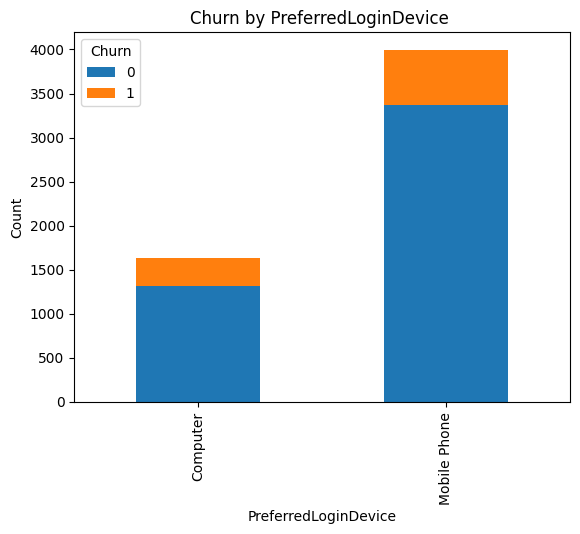

In [32]:
# Bar chart with churn rate
import seaborn as sns
# sns.catplot(x='PreferredLoginDevice', y='Churn', data=df, kind='bar')

# Group the data by 'OverTime' and 'Attrition', and calculate the count
grouped_data = df.groupby(['PreferredLoginDevice', 'Churn']).size().unstack().plot(kind='bar', stacked=True)

# Set the plot title, x-label, and y-label
plt.title('Churn by PreferredLoginDevice ')
plt.xlabel('PreferredLoginDevice')
plt.ylabel('Count')

# Show the plot
plt.show()


mobile phone users are likely to churn may be this indicates a problem on the app user experience on the app mobile version


In [33]:
import plotly.express as px
earth_palette = ["#A67C52", "#8F704D", "#B09B71", "#7E786E"]


fig=px.histogram(df,x="PreferedOrderCat",facet_col="CityTier",color="CityTier",color_discrete_sequence=earth_palette,text_auto= True , title="<b>"+'CityTier Vs PreferedOrderCat')

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferredPaymentMode',
yaxis_title='count',
)
fig.show()

Laptop and accessories and phones are the preffered catrogory for all tiers

In [34]:
df2.groupby('CityTier')[['PreferredPaymentMode']].value_counts()

CityTier  PreferredPaymentMode
1         Debit Card              1676
          Credit Card             1382
          Cash on Delivery         366
          UPI                      242
2         UPI                      114
          Debit Card                62
          Credit Card               50
          Cash on Delivery          16
3         E wallet                 614
          Debit Card               576
          Credit Card              342
          Cash on Delivery         132
          UPI                       58
Name: count, dtype: int64

In [35]:
import plotly.express as px

fig=px.histogram(df2,x="PreferredPaymentMode",facet_col="CityTier",color="CityTier",text_auto= True , title="<b>"+'CityTier Vs PaymentMethod')

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferredPaymentMode',
yaxis_title='count',
)
fig.show()

In [36]:
fig = px.histogram(df2, x="OrderCount", y="CityTier", orientation="h", color="CityTier" ,text_auto= True , title="<b>"+'CityTier Vs Sum of OrderCount' , color_discrete_sequence = ['#BA1F33','#3A506B','#3E885B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Sum of OrderCount',
yaxis_title='count',
)
fig.show()

In [37]:
# Group and count by 'Coup' and 'Churn'
coupoun_churnrate = pd.DataFrame(df2.groupby('CouponUsed')['Churn'].value_counts())
coupoun_churnrate = coupoun_churnrate.rename(columns={'Churn': 'Count'})
coupoun_churnrate = coupoun_churnrate.reset_index()


fig = px.bar(coupoun_churnrate, x='CouponUsed', y = 'count',color='Churn', barmode='group',color_discrete_sequence=['rgba(58, 71, 80, 0.6)' ,'rgba(246, 78, 139, 1.0)'],title="<b>"+'CouponUsed Vs Churn Rate',text_auto= True)
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='CouponUsed',
yaxis_title='Count',
)
fig.show()

Graph show churn becomes less whern more couppons are used

In [38]:
# fig = px.density_contour(df2, x="HourSpendOnApp", y="OrderCount", color = 'churn',
#                          title="<b>"+'HourSpendOnApp Vs OrderCount within churn',
#                           color_discrete_sequence=["#d62728", "#1f77b4"]
#                         )
fig = px.histogram(df2, x='CashbackAmount', y='OrderCount' ,color = 'Churn', title="<b>"+'CashbackAmount Vs OrderCount within churn', color_discrete_sequence=["#d62728", "#1f77b4"])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='CashbackAmount',
yaxis_title='OrderCount',
)
fig.show()

There seems to be a poitive relation between cashback amount and churn rate

In [39]:
round((df.isnull().sum()*100 / df.shape[0]),2)

Churn                          0.00
Tenure                         4.69
PreferredLoginDevice           0.00
CityTier                       0.00
WarehouseToHome                4.46
PreferredPaymentMode           0.00
Gender                         0.00
HourSpendOnApp                 4.53
NumberOfDeviceRegistered       0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
MaritalStatus                  0.00
NumberOfAddress                0.00
Complain                       0.00
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
CashbackAmount                 0.00
dtype: float64


**Data Preprocessing**

In [40]:
# impute with bfill Method
df['Tenure'] = df['Tenure'].fillna(method = 'bfill')

In [41]:
# Impute with simple imputer
from sklearn.impute import SimpleImputer
s_imp = SimpleImputer(missing_values=np.nan , strategy = 'most_frequent')
df['WarehouseToHome'] = s_imp.fit_transform(pd.DataFrame(df['WarehouseToHome']))

In [42]:
fill_list = df['HourSpendOnApp'].dropna()
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(pd.Series(np.random.choice(fill_list , size = len(df['HourSpendOnApp'].index))))

In [43]:
# impute with ffill method
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(method = 'ffill')

In [44]:
# Impute with KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df['CouponUsed']=imputer.fit_transform(df[['CouponUsed']])

# Impute with KNN imputer
imputer_2 = KNNImputer(n_neighbors=2)
df['OrderCount']=imputer_2.fit_transform(df[['OrderCount']])
# impute with bfill Method
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(method = 'bfill')

In [45]:
df.head

<bound method NDFrame.head of       Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0         1     4.0         Mobile Phone         3              6.0   
1         1     0.0         Mobile Phone         1              8.0   
2         1     0.0         Mobile Phone         1             30.0   
3         1     0.0         Mobile Phone         3             15.0   
4         1     0.0         Mobile Phone         1             12.0   
...     ...     ...                  ...       ...              ...   
5625      0    10.0             Computer         1             30.0   
5626      0    13.0         Mobile Phone         1             13.0   
5627      0     1.0         Mobile Phone         1             11.0   
5628      0    23.0             Computer         3              9.0   
5629      0     8.0         Mobile Phone         1             15.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0              Debit Card  Female             3.0                         3   
1                     UPI    Male             3.0                         4   
2              Debit Card    Male             2.0                         4   
3              Debit Card    Male             2.0                         4   
4             Credit Card    Male             2.0                         3   
...                   ...     ...             ...                       ...   
5625          Credit Card    Male             3.0                         2   
5626          Credit Card    Male             3.0                         5   
5627           Debit Card    Male             3.0                         2   
5628          Credit Card    Male             4.0                         5   
5629          Credit Card    Male             3.0                         2   

        PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0     Laptop & Accessory                  2        Single                9   
1           Mobile Phone                  3        Single                7   
2           Mobile Phone                  3        Single                6   
3     Laptop & Accessory                  5        Single                8   
4           Mobile Phone                  5        Single                3   
...                  ...                ...           ...              ...   
5625  Laptop & Accessory                  1       Married                6   
5626             Fashion                  5       Married                6   
5627  Laptop & Accessory                  4       Married                3   
5628  Laptop & Accessory                  4       Married                4   
5629  Laptop & Accessory                  3       Married                4   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0            1                         11.0         1.0         1.0   
1            1                         15.0         0.0         1.0   
2            1                         14.0         0.0         1.0   
3            0                         23.0         0.0         1.0   
4            0                         11.0         1.0         1.0   
...        ...                          ...         ...         ...   
5625         0                         18.0         1.0         2.0   
5626         0                         16.0         1.0         2.0   
5627         1                         21.0         1.0         2.0   
5628         0                         15.0         2.0         2.0   
5629         0                         13.0         2.0         2.0   

      DaySinceLastOrder  CashbackAmount  
0                   5.0          159.93  
1                   0.0          120.90  
2                   3.0          120.28  
3                   3.0          134.07  
4                   3.0          129.60  
...                 ...             ...  
5625                4.0          150.71  
5626                4.0          224.91  


In [46]:
# check before encoding that my catogries for my columns are limited
for i in df.columns:
    if df[i].dtype == 'object':
        print(df[i].value_counts())
        print('*' * 40)


PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64
****************************************
PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64
****************************************
Gender
Male      3384
Female    2246
Name: count, dtype: int64
****************************************
PreferedOrderCat
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64
****************************************
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64
****************************************


In [47]:
# cat columns
data = df[df.select_dtypes(exclude=np.number).columns]
data

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Mobile Phone,UPI,Male,Mobile Phone,Single
2,Mobile Phone,Debit Card,Male,Mobile Phone,Single
3,Mobile Phone,Debit Card,Male,Laptop & Accessory,Single
4,Mobile Phone,Credit Card,Male,Mobile Phone,Single
...,...,...,...,...,...
5625,Computer,Credit Card,Male,Laptop & Accessory,Married
5626,Mobile Phone,Credit Card,Male,Fashion,Married
5627,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
5628,Computer,Credit Card,Male,Laptop & Accessory,Married


In [48]:
le = LabelEncoder()

In [49]:
# Encode for cat_cols
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

df.head(4)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,2,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,1,0.0,1,1,8.0,4,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,1,0.0,1,1,30.0,2,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,1,3,15.0,2,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07


In [50]:
# Handling outliers
df.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice             int64
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode             int64
Gender                           int64
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                 int64
SatisfactionScore                int64
MaritalStatus                    int64
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [51]:
# lets detect True Outliers
def handle_outliers(df , column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  # Define Upper and lower boundaries
  Upper = Q3 + IQR * 1.5
  lower = Q1 - IQR * 1.5

  # lets make filter for col values
  new_df = df[ (df[column_name] > lower) & (df[column_name] < Upper) ]

  return new_df

In [52]:
# lets Give our Functions columns contains outlier
cols_outliers = ['Tenure' , 'WarehouseToHome' , 'NumberOfAddress' , 'DaySinceLastOrder' , 'HourSpendOnApp' , 'NumberOfDeviceRegistered']

for col in cols_outliers:
    df = handle_outliers(df , col)

df.head(4)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,2,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,1,0.0,1,1,8.0,4,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,1,0.0,1,1,30.0,2,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,1,3,15.0,2,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07


In [53]:
corr_matrix = df.corr()
corr_matrix

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,1.000000,-0.336058,-0.041250,0.069595,0.054768,-0.005156,0.038193,0.002930,0.079116,0.105149,0.108600,0.131982,0.033703,0.252346,-0.002545,-0.017914,-0.036568,-0.164448,-0.165008
Tenure,-0.336058,1.000000,0.034596,-0.065933,-0.011849,-0.016797,-0.054684,-0.007758,-0.019592,-0.180637,-0.013331,-0.111074,0.240939,-0.023903,0.017177,0.127314,0.181138,0.164444,0.453981
PreferredLoginDevice,-0.041250,0.034596,1.000000,0.010097,-0.015852,0.009610,-0.012892,0.022263,-0.005323,0.005137,0.037642,-0.020207,0.033310,0.005983,-0.005296,-0.015940,-0.021975,-0.027906,0.042321
CityTier,0.069595,-0.065933,0.010097,1.000000,0.014636,0.251539,-0.022759,-0.012586,0.007282,-0.164040,-0.009735,0.002254,-0.033363,0.006312,-0.022135,0.017139,0.035656,0.023394,0.044946
WarehouseToHome,0.054768,-0.011849,-0.015852,0.014636,1.000000,0.008046,-0.015904,0.081566,0.029049,-0.114357,0.013783,-0.028226,0.001173,0.022052,0.028927,0.013175,0.016235,0.044883,0.036318
PreferredPaymentMode,-0.005156,-0.016797,0.009610,0.251539,0.008046,1.000000,0.020086,-0.012174,0.012908,-0.030738,-0.018085,-0.024158,0.003223,0.028288,-0.000268,-0.008582,-0.039249,-0.003581,0.034381
Gender,0.038193,-0.054684,-0.012892,-0.022759,-0.015904,0.020086,1.000000,-0.011561,-0.020954,0.060969,-0.037348,-0.019975,-0.030577,-0.030350,-0.007694,-0.026477,-0.031097,-0.027594,-0.024311
HourSpendOnApp,0.002930,-0.007758,0.022263,-0.012586,0.081566,-0.012174,-0.011561,1.000000,0.270535,0.029914,0.033441,-0.043086,0.141247,0.003494,0.102121,0.182444,0.104953,0.081575,0.115298
NumberOfDeviceRegistered,0.079116,-0.019592,-0.005323,0.007282,0.029049,0.012908,-0.020954,0.270535,1.000000,-0.011521,-0.001042,0.037437,0.071084,-0.002056,0.061287,0.135974,0.092487,0.026054,0.120031
PreferedOrderCat,0.105149,-0.180637,0.005137,-0.164040,-0.114357,-0.030738,0.060969,0.029914,-0.011521,1.000000,-0.002726,0.042430,-0.096412,-0.000339,0.001494,-0.153064,-0.179645,-0.235615,-0.340988


<Axes: >

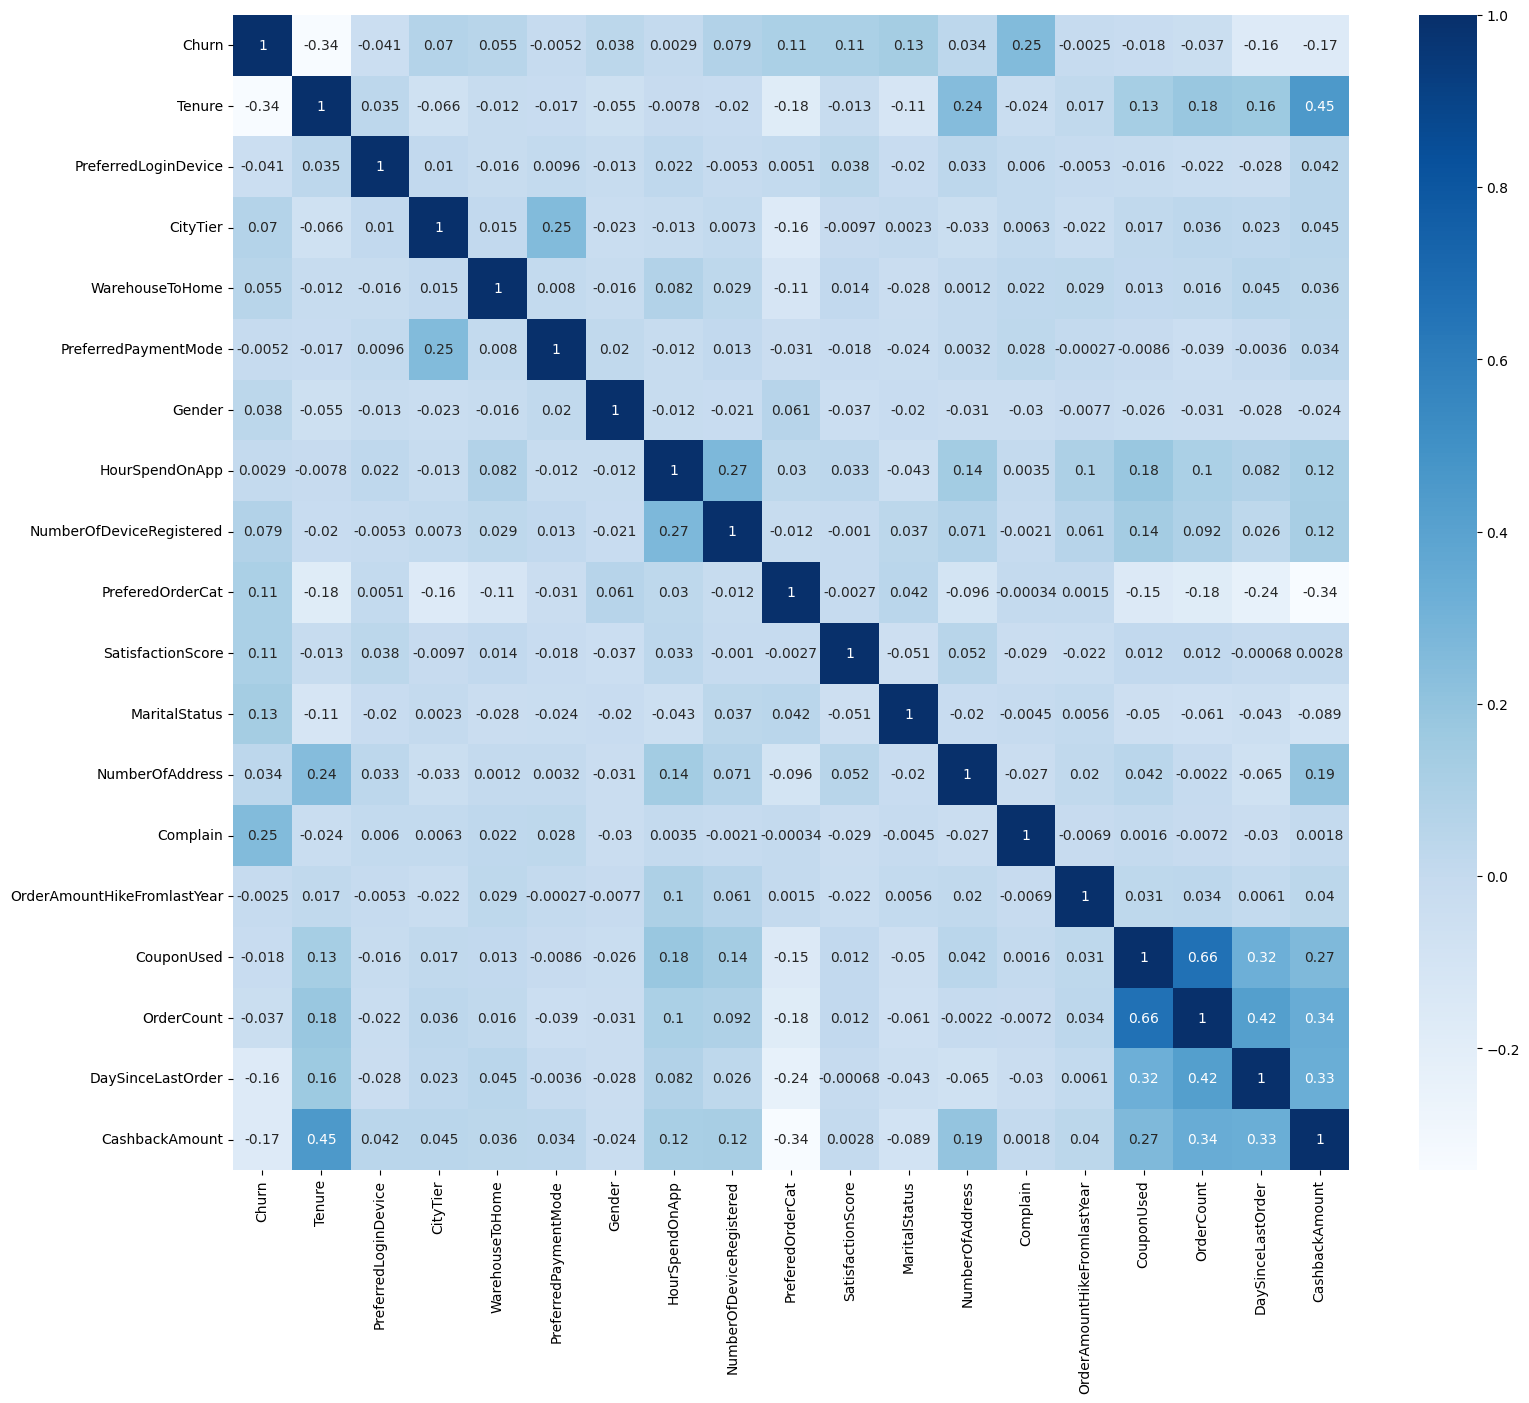

In [54]:
plt.figure(figsize = (18,15))
sns.heatmap(df.corr() , annot = True , cmap = 'Blues')

In [55]:
churn_corr_vector = corr_matrix['Churn'].sort_values(ascending = False)
churn_corr_vector

Churn                          1.000000
Complain                       0.252346
MaritalStatus                  0.131982
SatisfactionScore              0.108600
PreferedOrderCat               0.105149
NumberOfDeviceRegistered       0.079116
CityTier                       0.069595
WarehouseToHome                0.054768
Gender                         0.038193
NumberOfAddress                0.033703
HourSpendOnApp                 0.002930
OrderAmountHikeFromlastYear   -0.002545
PreferredPaymentMode          -0.005156
CouponUsed                    -0.017914
OrderCount                    -0.036568
PreferredLoginDevice          -0.041250
DaySinceLastOrder             -0.164448
CashbackAmount                -0.165008
Tenure                        -0.336058
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Relation Between Features and target')

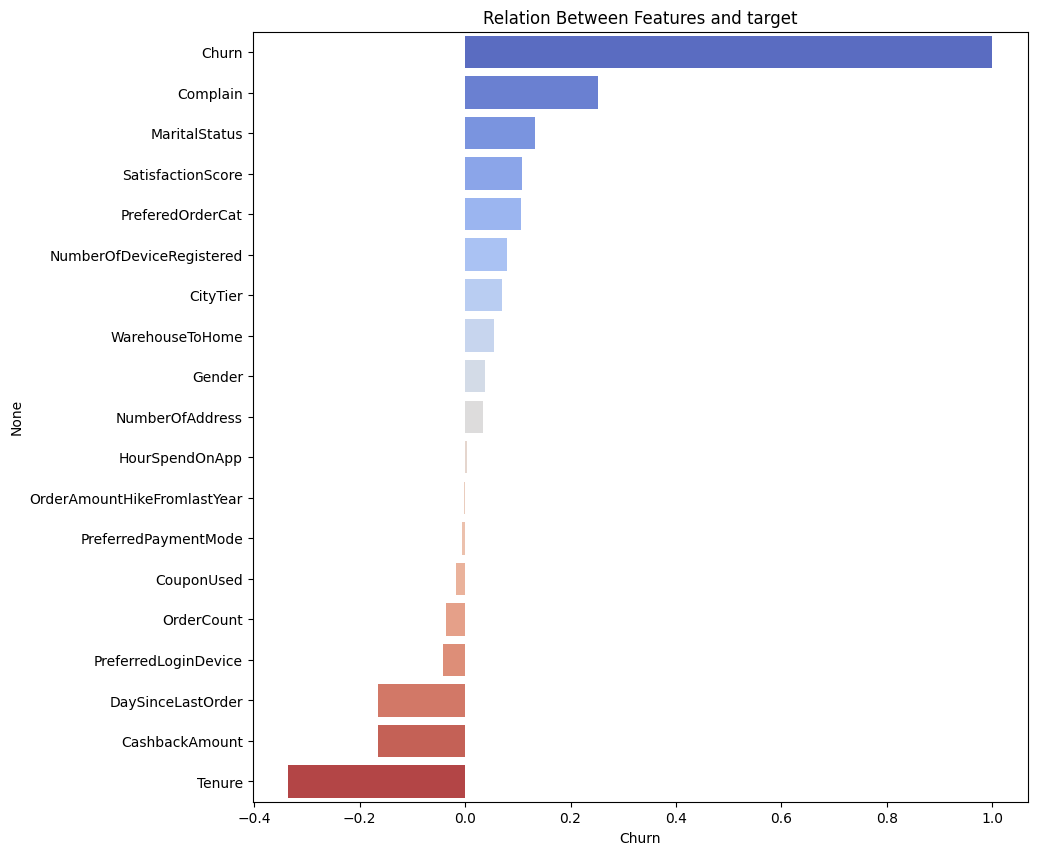

In [56]:
plt.figure(figsize = (10,10))
sns.barplot(x = churn_corr_vector , y = churn_corr_vector.index , palette = 'coolwarm')
plt.title('Relation Between Features and target')

In [57]:
fig = px.histogram(df2, x="Churn", color="Churn" ,text_auto= True , title="<b>"+'Check Imbalance' , color_discrete_sequence = ['#BA1F33','#3A506B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Churn',
yaxis_title='count',
)
fig.show()

#### Our Data Imbalanced so lets make Over sample for it Using SMOTETomek

In [58]:
X = df.drop('Churn' , axis = 1)
Y = df['Churn']

In [59]:
from imblearn.combine import SMOTETomek

In [60]:
smt = SMOTETomek(random_state=42)
x_over , y_over = smt.fit_resample(X , Y)
x_over.shape, y_over.shape

((8582, 18), (8582,))

In [61]:
X

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.0,1,3,6.0,2,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,0.0,1,1,8.0,4,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,0.0,1,1,30.0,2,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,0.0,1,3,15.0,2,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07
4,0.0,1,1,12.0,1,1,2.0,3,3,5,2,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,10.0,0,1,30.0,1,1,3.0,2,2,1,1,6,0,18.0,1.0,2.0,4.0,150.71
5626,13.0,1,1,13.0,1,1,3.0,5,0,5,1,6,0,16.0,1.0,2.0,4.0,224.91
5627,1.0,1,1,11.0,2,1,3.0,2,2,4,1,3,1,21.0,1.0,2.0,4.0,186.42
5628,23.0,0,3,9.0,1,1,4.0,5,2,4,1,4,0,15.0,2.0,2.0,9.0,178.90


In [62]:
x_train , x_test , y_train , y_test = train_test_split(x_over , y_over , test_size = 0.30 , random_state = 42)

In [63]:
# Now we  will make normalization for all data to make them in commom range
from sklearn.preprocessing import MinMaxScaler , StandardScaler , RobustScaler

MN = MinMaxScaler()
# SC = StandardScaler()
# Rb = RobustScaler()
x_train_scaled = MN.fit_transform(x_train)
x_test_scaled = MN.fit_transform(x_test)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings

warnings.filterwarnings("ignore")


logisreg_clf = LogisticRegression()
svm_clf = SVC()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
XGB_clf = XGBClassifier()
ada_clf = AdaBoostClassifier()

In [65]:
clf_list = [logisreg_clf, svm_clf, dt_clf, rf_clf, XGB_clf, ada_clf]
clf_name_list = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'XGBClassifier' , 'AdaBoostClassifier']

for clf in clf_list:
    clf.fit(x_train_scaled,y_train)

In [66]:
train_acc_list = []
test_acc_list = []

for clf,name in zip(clf_list,clf_name_list):
    y_pred_train = clf.predict(x_train_scaled)
    y_pred_test = clf.predict(x_test_scaled)
    print(f'Using model: {name}')
    print(f'Trainning Score: {clf.score(x_train_scaled, y_train)}')
    print(f'Test Score: {clf.score(x_test_scaled, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')
    train_acc_list.append(accuracy_score(y_train, y_pred_train))
    test_acc_list.append(accuracy_score(y_test, y_pred_test))
    print(' ' * 60)
    print('*' * 60)
    print(' ' * 60)

Using model: Logistic Regression
Trainning Score: 0.7692691859497254
Test Score: 0.7728155339805826
Acc Train: 0.7692691859497254
Acc Test: 0.7728155339805826
                                                            
************************************************************
                                                            
Using model: Support Vector Machine
Trainning Score: 0.9057765939736974
Test Score: 0.8788349514563106
Acc Train: 0.9057765939736974
Acc Test: 0.8788349514563106
                                                            
************************************************************
                                                            
Using model: Decision Tree
Trainning Score: 1.0
Test Score: 0.9363106796116505
Acc Train: 1.0
Acc Test: 0.9363106796116505
                                                            
************************************************************
                                                            
Using m

In [67]:
# graph to determine best 2 models

all_models = pd.DataFrame({'Train_Accuarcy': train_acc_list , 'Test_Accuarcy' : test_acc_list}  , index = clf_name_list)
all_models

,Train_Accuarcy,Test_Accuarcy
Logistic Regression,0.769269,0.772816
Support Vector Machine,0.905777,0.878835
Decision Tree,1.000000,0.936311
Random Forest,1.000000,0.968932
XGBClassifier,1.000000,0.968155
AdaBoostClassifier,0.877643,0.843495


In [68]:
# Models vs Train Accuracies
fig = px.bar(all_models, x=all_models['Train_Accuarcy'], y = all_models.index ,color=all_models['Train_Accuarcy'],title="<b>"+'Models Vs Train Accuracies',text_auto= True , color_continuous_scale='Reds')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Train Sccracy',
yaxis_title='Models Names',
)
fig.show()


# Models vs Test Accuracies
fig = px.bar(all_models, x=all_models['Test_Accuarcy'], y = all_models.index ,color=all_models['Test_Accuarcy'],title="<b>"+'Models Vs Test Accuracies',text_auto= True , color_continuous_scale='Reds')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Test Accuarcy',
yaxis_title='Models Names',
)
fig.show()

In [69]:
!pip install mlxtend

In [70]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, RocCurveDisplay

Accuracy = 0.7728155339805826
ROC Area under Curve = 0.7724795985604946
              precision    recall  f1-score   support

           0    0.77905   0.75138   0.76497      1267
           1    0.76718   0.79358   0.78016      1308

    accuracy                        0.77282      2575
   macro avg    0.77312   0.77248   0.77256      2575
weighted avg    0.77302   0.77282   0.77268      2575

**********************************************************************


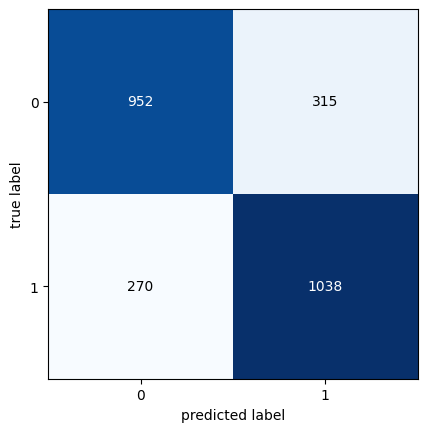

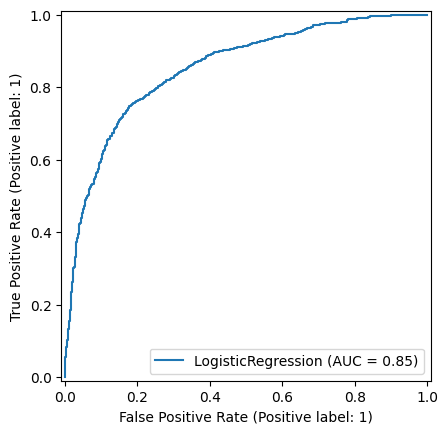

In [71]:
# Logistic regression
model= LogisticRegression()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc1 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc1))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
print('*' * 70)
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.9401941747572815
ROC Area under Curve = 0.9400676789545966
              precision    recall  f1-score   support

           0    0.94556   0.93212   0.93879      1267
           1    0.93514   0.94801   0.94153      1308

    accuracy                        0.94019      2575
   macro avg    0.94035   0.94007   0.94016      2575
weighted avg    0.94027   0.94019   0.94018      2575



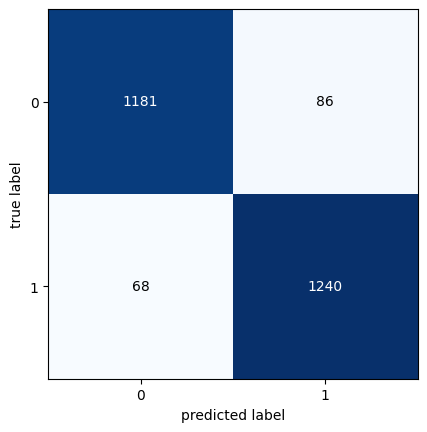

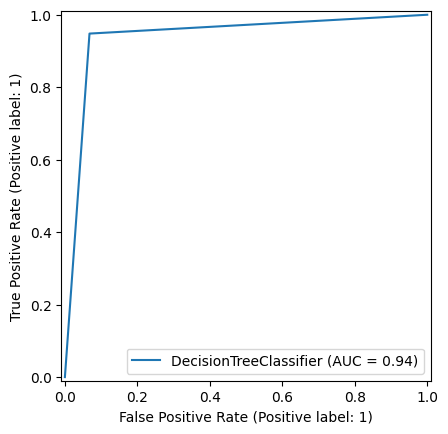

In [72]:
# Decision Tree
model=DecisionTreeClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc3 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc3))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.9681553398058252
ROC Area under Curve = 0.967714314678175
              precision    recall  f1-score   support

           0    0.99499   0.94002   0.96672      1267
           1    0.94485   0.99541   0.96947      1308

    accuracy                        0.96816      2575
   macro avg    0.96992   0.96771   0.96810      2575
weighted avg    0.96952   0.96816   0.96812      2575



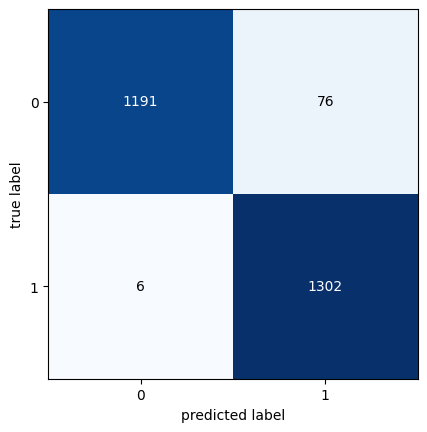

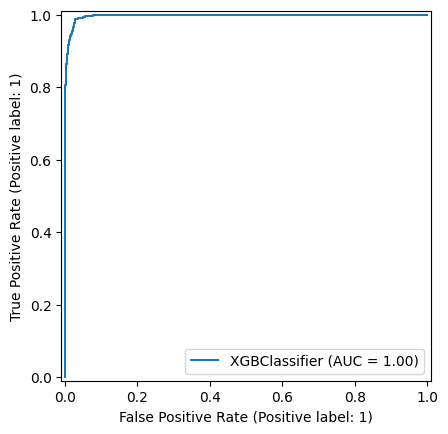

In [73]:
# XGBoost
model=XGBClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc5 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc5))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

In [74]:
!pip install pycaret


In [75]:
from pycaret.classification import *

In [76]:
# init setup
model_setup = setup(df , target = 'Churn' , train_size=0.7)

,Description,Value
0,Session id,7538
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(5155, 19)"
4,Transformed data shape,"(5155, 19)"
5,Transformed train set shape,"(3608, 19)"
6,Transformed test set shape,"(1547, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


In [77]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9587,0.9809,0.8327,0.9152,0.8694,0.8451,0.8481,0.2890
et,Extra Trees Classifier,0.9570,0.9908,0.7763,0.9607,0.8569,0.8320,0.8397,0.6090
lightgbm,Light Gradient Boosting Machine,0.9543,0.9778,0.8011,0.9174,0.8523,0.8255,0.8300,0.4090
rf,Random Forest Classifier,0.9507,0.9817,0.7697,0.9242,0.8380,0.8093,0.8152,0.8900
dt,Decision Tree Classifier,0.9221,0.8718,0.7961,0.7530,0.7728,0.7259,0.7271,0.1160
gbc,Gradient Boosting Classifier,0.9080,0.9282,0.5827,0.8234,0.6787,0.6270,0.6419,1.1320
ada,Ada Boost Classifier,0.8861,0.9013,0.5296,0.7187,0.6064,0.5421,0.5525,0.5040
lda,Linear Discriminant Analysis,0.8739,0.8498,0.3937,0.7340,0.5081,0.4439,0.4743,0.1320
lr,Logistic Regression,0.8733,0.8593,0.4185,0.7093,0.5238,0.4566,0.4791,1.0890
ridge,Ridge Classifier,0.8589,0.8498,0.1721,0.9137,0.2870,0.2485,0.3581,0.0690


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [89]:
# max voting
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)

# Create the ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('Random Forest', rf_classifier),
    ('Decision Tree', dt_classifier),
    ('XGBoost', xgb_classifier)
], voting='hard')
ensemble_model.fit(x_train, y_train)

# Make predictions
y_pred = ensemble_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred,digits=5))

Accuracy: 0.9790291262135923
              precision    recall  f1-score   support

           0    0.98872   0.96843   0.97847      1267
           1    0.97001   0.98930   0.97956      1308

    accuracy                        0.97903      2575
   macro avg    0.97937   0.97886   0.97901      2575
weighted avg    0.97922   0.97903   0.97902      2575



In [90]:
#stacked ensemble method
# Train base models
base_model1 = XGBClassifier(random_state=42)
base_model1.fit(x_train, y_train)
base_model2 = RandomForestClassifier(n_estimators=100, random_state=42)
base_model2.fit(x_train, y_train)
# ... (train additional base models)

# Create new dataset with base model predictions as features
X_stacked = np.concatenate((x_train,
                             base_model1.predict(x_train).reshape(-1, 1),
                             base_model2.predict(x_train).reshape(-1, 1),
                             # ... (add predictions from other base models)
                             ), axis=1)

# Train meta-model on stacked dataset
meta_model = DecisionTreeClassifier(random_state=42)
meta_model.fit(X_stacked, y_train)

# Make predictions using the meta-model
y_pred_stack = meta_model.predict(np.concatenate((x_test,
                                              base_model1.predict(x_test).reshape(-1, 1),
                                              base_model2.predict(x_test).reshape(-1, 1),
                                              # ... (add predictions from other base models)
                                              ), axis=1))
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_stack)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred_stack,digits=5))

Accuracy: 0.9766990291262136
              precision    recall  f1-score   support

           0    0.98319   0.96922   0.97615      1267
           1    0.97059   0.98394   0.97722      1308

    accuracy                        0.97670      2575
   macro avg    0.97689   0.97658   0.97669      2575
weighted avg    0.97679   0.97670   0.97670      2575



In [91]:
# cascade ensemble technique
# Train first model
model1 = XGBClassifier(random_state=42)
model1.fit(x_train, y_train)

# Create new features with predictions from first model
X_cascaded = np.concatenate((x_train, model1.predict(x_train).reshape(-1, 1)), axis=1)

# Train second model on cascaded features
model2 =RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_cascaded, y_train)

# Make predictions using the cascaded models
y_pred_cascade = model2.predict(np.concatenate((x_test, model1.predict(x_test).reshape(-1, 1)), axis=1))

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_cascade)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred_cascade,digits=5))

Accuracy: 0.9829126213592233
              precision    recall  f1-score   support

           0    0.98959   0.97553   0.98251      1267
           1    0.97662   0.99006   0.98330      1308

    accuracy                        0.98291      2575
   macro avg    0.98311   0.98280   0.98290      2575
weighted avg    0.98300   0.98291   0.98291      2575



In [92]:
#blending ensemble technique
# Train base models (replace with your hyperparameters)
model1 = XGBClassifier(n_estimators=100, random_state=42)
model1.fit(x_train, y_train)
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(x_train, y_train)

# Make predictions from each model on the training data
predictions_train_model1 = model1.predict(x_train)
predictions_train_model2 = model2.predict(x_train)

# Combine training data features with predictions from base models
X_train_blended = np.concatenate((x_train, predictions_train_model1.reshape(-1, 1), predictions_train_model2.reshape(-1, 1)), axis=1)

# Train meta-model (LinearRegression in this example, can be replaced)
meta_model = DecisionTreeClassifier()  # Replace with DecisionTreeClassifier if desired
meta_model.fit(X_train_blended, y_train)

# Make predictions on the test data using base models
predictions_test_model1 = model1.predict(x_test)
predictions_test_model2 = model2.predict(x_test)

# Combine test data features with predictions from base models
X_test_blended = np.concatenate((x_test, predictions_test_model1.reshape(-1, 1), predictions_test_model2.reshape(-1, 1)), axis=1)

# Make final predictions using the meta-model on the blended test data
y_pred_blending = meta_model.predict(X_test_blended)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_blending)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred_blending,digits=5))

Accuracy: 0.9829126213592233
              precision    recall  f1-score   support

           0    0.98959   0.97553   0.98251      1267
           1    0.97662   0.99006   0.98330      1308

    accuracy                        0.98291      2575
   macro avg    0.98311   0.98280   0.98290      2575
weighted avg    0.98300   0.98291   0.98291      2575



In [93]:
# Grid search for random forest
# Define Random Forest hyperparameters
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Perform Grid Search for Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(), param_grid=rf_params, cv=5, n_jobs=-1)
rf_grid_search.fit(x_train, y_train)
best_rf_model = rf_grid_search.best_estimator_

# Evaluate Random Forest model
rf_predictions = best_rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
# Print classification report
print(classification_report(y_test, rf_predictions,digits=5))

Random Forest Accuracy: 0.9778640776699029
              precision    recall  f1-score   support

           0    0.98478   0.97001   0.97734      1267
           1    0.97136   0.98547   0.97837      1308

    accuracy                        0.97786      2575
   macro avg    0.97807   0.97774   0.97785      2575
weighted avg    0.97796   0.97786   0.97786      2575



In [95]:
# Define Gradient Boosting hyperparameters
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

# Perform Grid Search for Gradient Boosting
gb_grid_search = GridSearchCV(XGBClassifier(), param_grid=gb_params, cv=5, n_jobs=-1)
gb_grid_search.fit(x_train, y_train)
best_gb_model = gb_grid_search.best_estimator_

# Evaluation
gb_predictions = best_gb_model.predict(x_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting:", gb_accuracy)
# Print classification report
print(classification_report(y_test, gb_predictions,digits=5))

Gradient Boosting: 0.9864077669902913
              precision    recall  f1-score   support

           0    0.99280   0.97948   0.98609      1267
           1    0.98038   0.99312   0.98671      1308

    accuracy                        0.98641      2575
   macro avg    0.98659   0.98630   0.98640      2575
weighted avg    0.98649   0.98641   0.98641      2575



In [97]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
models = {}

# SVM classifier
models["SVM"] = SVC(kernel='linear')  # Linear kernel for interpretability
models["SVM"].fit(x_train, y_train)

# KNN classifier
models["KNN"] = KNeighborsClassifier(n_neighbors=5)
models["KNN"].fit(x_train, y_train)

# AdaBoost classifier
models["AdaBoost"] = AdaBoostClassifier(n_estimators=100)
models["AdaBoost"].fit(x_train, y_train)

# Naive Bayes classifier
models["Naive Bayes"] = GaussianNB()
models["Naive Bayes"].fit(x_train, y_train)

# Neural network classifier (using a simple MLP)
from sklearn.neural_network import MLPClassifier
models["Neural Network"] = MLPClassifier(solver='lbfgs', alpha=0.01, hidden_layer_sizes=(10,))
models["Neural Network"].fit(x_train, y_train)

# Evaluate model performance
for name, model in models.items():
  y_pred = model.predict(x_test)
  print(name,accuracy_score(y_test, y_pred))
  print(f"**{name} Classification Report**")
  print(classification_report(y_test, y_pred,digits=5))

SVM 0.7739805825242718
**SVM Classification Report**
              precision    recall  f1-score   support

           0    0.78329   0.74743   0.76494      1267
           1    0.76574   0.79969   0.78235      1308

    accuracy                        0.77398      2575
   macro avg    0.77452   0.77356   0.77365      2575
weighted avg    0.77438   0.77398   0.77378      2575

KNN 0.9029126213592233
**KNN Classification Report**
              precision    recall  f1-score   support

           0    0.99707   0.80505   0.89083      1267
           1    0.84085   0.99771   0.91259      1308

    accuracy                        0.90291      2575
   macro avg    0.91896   0.90138   0.90171      2575
weighted avg    0.91772   0.90291   0.90188      2575

AdaBoost 0.897864077669903
**AdaBoost Classification Report**
              precision    recall  f1-score   support

           0    0.87915   0.91871   0.89849      1267
           1    0.91767   0.87768   0.89723      1308

    accuracy  

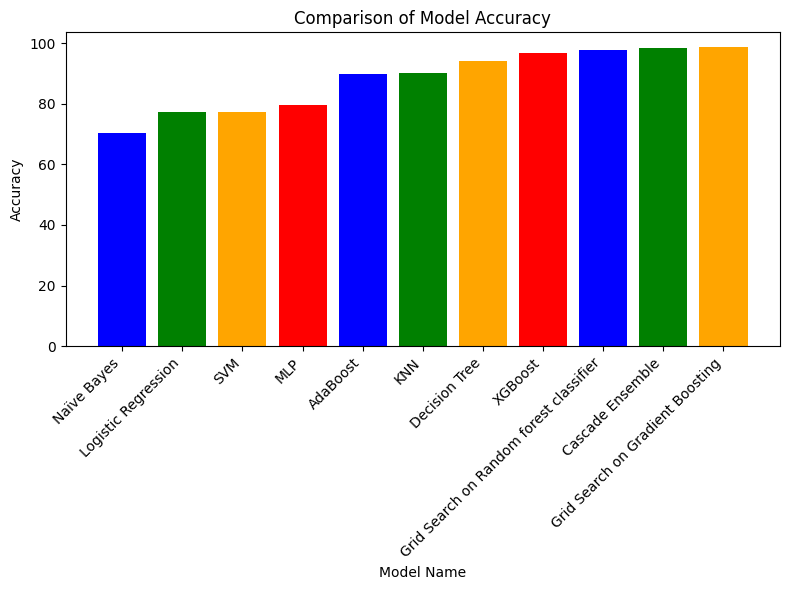

In [2]:
import matplotlib.pyplot as plt
# Define model names and corresponding accuracy scores
model_names = ["Naïve Bayes", "Logistic Regression", "SVM", "MLP","AdaBoost","KNN","Decision Tree","XGBoost","Grid Search on Random forest classifier","Cascade Ensemble","Grid Search on Gradient Boosting"]
accuracies = [70.213,77.281,77.398,79.611,89.786,90.291,94.019,96.815,97.786,98.291,98.641]  # Replace with your desired accuracies
# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel("Model Name")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracy")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

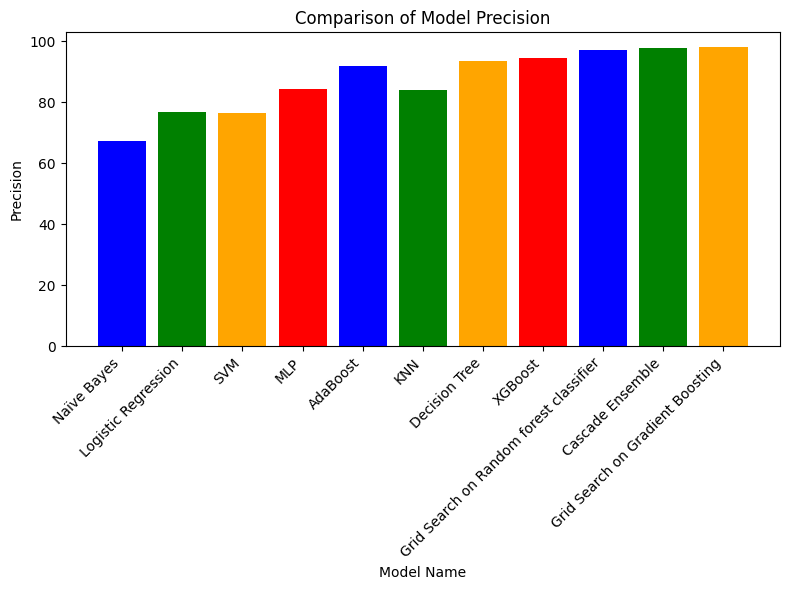

In [3]:
# Define model names and corresponding accuracy scores
model_names = ["Naïve Bayes", "Logistic Regression", "SVM", "MLP","AdaBoost","KNN","Decision Tree","XGBoost","Grid Search on Random forest classifier","Cascade Ensemble","Grid Search on Gradient Boosting"]
Precision = [67.440,76.718,76.574,84.192,91.767,84.085,93.514,94.485,97.136,97.662,98.038]  # Replace with your desired accuracies
# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(model_names, Precision, color=['blue', 'green', 'orange', 'red'])
plt.xlabel("Model Name")
plt.ylabel("Precision")
plt.title("Comparison of Model Precision")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

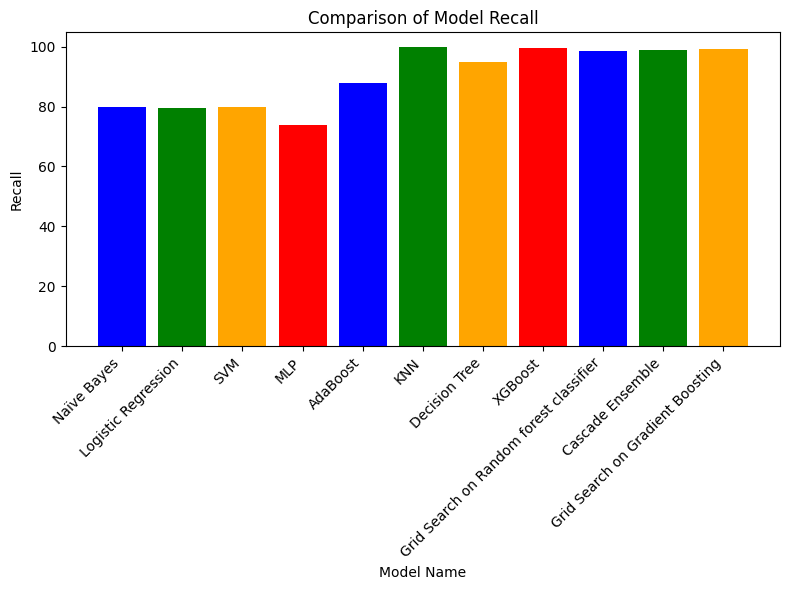

In [4]:
# Define model names and corresponding accuracy scores
model_names = ["Naïve Bayes", "Logistic Regression", "SVM", "MLP","AdaBoost","KNN","Decision Tree","XGBoost","Grid Search on Random forest classifier","Cascade Ensemble","Grid Search on Gradient Boosting"]
Recall = [79.969,79.358,79.969,73.700,87.768,99.771,94.801,99.541,98.547,99.006,99.312]  # Replace with your desired accuracies
# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(model_names,Recall, color=['blue', 'green', 'orange', 'red'])
plt.xlabel("Model Name")
plt.ylabel("Recall")
plt.title("Comparison of Model Recall")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

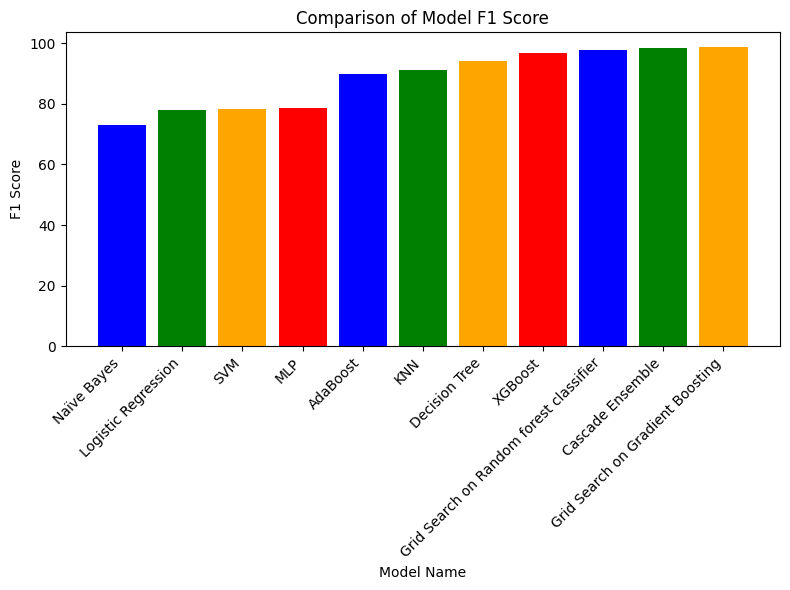

In [5]:


# Define model names and corresponding accuracy scores
model_names = ["Naïve Bayes", "Logistic Regression", "SVM", "MLP","AdaBoost","KNN","Decision Tree","XGBoost","Grid Search on Random forest classifier","Cascade Ensemble","Grid Search on Gradient Boosting"]
f1_score = [73.172,78.016,78.235,78.598,89.723,91.259,94.153,96.947,97.837 ,98.330,98.671]  # Replace with your desired accuracies
# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(model_names, f1_score, color=['blue', 'green', 'orange', 'red'])
plt.xlabel("Model Name")
plt.ylabel("F1 Score")
plt.title("Comparison of Model F1 Score")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()